In [61]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [62]:
class WindyGridworld:
    def __init__(self, size_x, size_y):
        self.size_x = size_x
        self.size_y = size_y
        self.start = (3,0)
        self.goal = (3,7)
        self.actions = [(0,1), (1,0), (0,-1), (-1,0)]
        self.wind = [0,0,0,1,1,1,2,2,1,0]
        self.epsilon = 0.1

    def getNextState(self,state, action):
        i, j = state
        WIND = self.wind
        if action == (-1,0):
            return (max(i - 1 - WIND[j], 0), j),-1
        elif action == (1,0):
            return (max(min(i + 1 - WIND[j], self.size_x - 1), 0), j),-1
        elif action == (0,-1):
            return (max(i - WIND[j], 0), max(j - 1, 0)),-1
        elif action == (0,1):
            return (max(i - WIND[j], 0), min(j + 1, self.size_y - 1)),-1
        
    def actionToint(self,action):
        return self.actions.index(action)
    
    def episode(self, action_value):
        state = self.start
        action = 999
        
        #selecting action using e-greedy policy
        if(random.random() < self.epsilon):
            action = np.random.choice([0,1,2,3])
            action = self.actions[action]
        else:
            #greedy action using action values
            values = action_value[state[0], state[1], : ]
            action = np.argmax(values)
            action = self.actions[action]
            
        total_rewards = 0
        #running infinite loop and generating a sequence
        while(True):
            #Getting next state and then next action from the next state using e-greedy
            new_state, reward = self.getNextState(state, action)
            new_action = 999
            if(random.random() < self.epsilon):
                new_action = np.random.choice([0,1,2,3])
                new_action = self.actions[new_action]
            else:
                #greedy action using action values
                values = action_value[new_state[0], new_state[1], : ]
                new_action = np.argmax(values)
                new_action = self.actions[new_action]
            
            #calculate total rewards
            total_rewards += 1
            
            #updaing action values using the update given for SARSA
            action_value[state[0], state[1], self.actionToint(action)] += 0.5*(reward + action_value[new_state[0], new_state[1], self.actionToint(new_action)] - action_value[state[0], state[1], self.actionToint(action)])
            
            #updating current state and action
            state = new_state
            action = new_action    
            
            #stop when we reach goal
            if(state == self.goal):
                break
        return total_rewards
    
    def figure(self):
        action_values = np.zeros((self.size_x, self.size_y, len(self.actions)))
        episode_limit = 500
        
        step= []
        ep = 0
        while(ep < episode_limit):
            t = self.episode(action_values)
#             print(t)
#             print(action_values)
            step.append(t)
            ep += 1
            
        step = np.add.accumulate(step)
        
        plt.figure(figsize=(20,10))
        plt.plot(step, np.arange(1, len(step) + 1)) 
#         print(action_values)
        
        print(self.actions)
        for i in range(self.size_x):
            for j in range(self.size_y):
                action = np.argmax(action_values[i,j,:])
                if(action == 0):
                    print('R', end=" ")
                elif(action == 1):
                    print('D', end=" ")
                elif(action == 2):
                    print('L', end=" ")
                else:
                    print('U', end=" ")
            print()
        

[(0, 1), (1, 0), (0, -1), (-1, 0)]
R R R R R R R R R D 
L R U U R R R D R D 
R R R U R R R D R D 
U U D R R R L R D D 
R R R R U R R D L L 
R R R D R R R D L D 
R R R R R R R R L L 


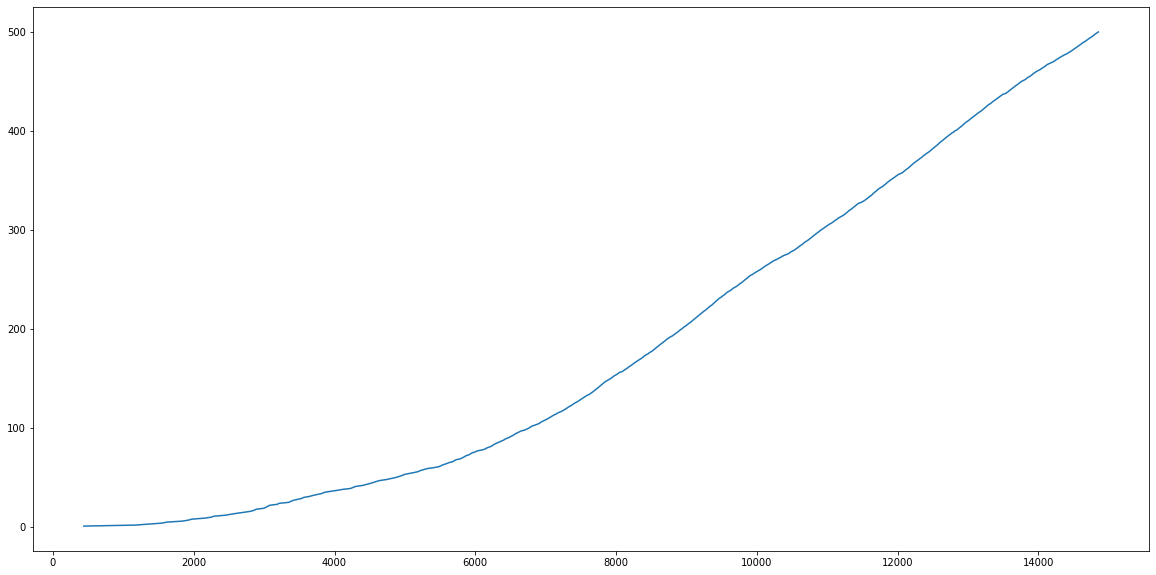

In [63]:
grid = WindyGridworld(7,10)
grid.figure()